<a href="https://colab.research.google.com/github/Utsav-J/deepLearning-AI-tf/blob/main/LongDistanceProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np

from keras.layers import Dense, Flatten, SimpleRNN, LSTM, GRU, GlobalMaxPooling2D, Input
from keras.models import Model
from keras.optimizers import Adam,SGD

In [3]:
#dataset
#non linear and long distance based dataset

T = 10
D = 1
X = []
Y = []

# checking the sign of 3 consequtive numbers
# making a pattern of + - + and stuff
# the pattern is at beginning then the lstm should remember for longer - a challenge
# if at the end, then it wont have a trouble remembering
def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
  # -1 -2 -3 means last, second last third last
#   y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

decision boudnary is non linear but we are using Linear model

it wont work

but still, its fun to see

# **Failure of Linear**

In [ ]:
i = Input(shape = (T,))
x = Dense(1, activation = 'sigmoid')(i)
model = Model(i,x)

model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(learning_rate = 0.01),
              metrics = 'Accuracy')

r = model.fit(X,Y, epochs  = 100, validation_split = 0.5)

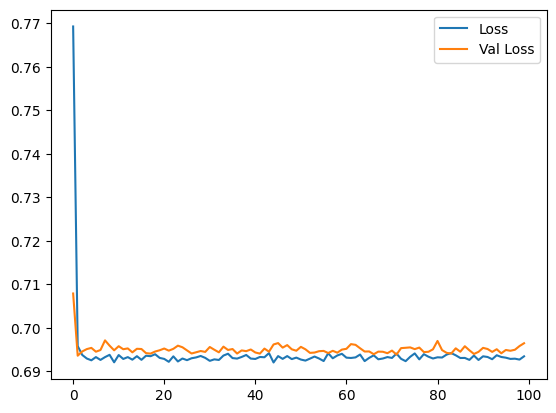

In [5]:
plt.plot(r.history['loss'], label = 'Loss')
plt.plot(r.history['val_loss'], label = 'Val Loss')
plt.legend()

# **USING SIMPLERNN**

In [17]:
inputs = np.expand_dims(X,-1)   # this time we call it inputs instead of overwriting X
i = Input(shape =  (T,D))
x = SimpleRNN(5)(i)

x = Dense(1)(x)
model = Model(i,x)
model.compile(loss= 'binary_crossentropy',
              optimizer  = Adam(learning_rate = 0.01),
              metrics = ["accuracy"])

In [ ]:
r = model.fit(inputs, Y, epochs = 200 , validation_split = 0.5)

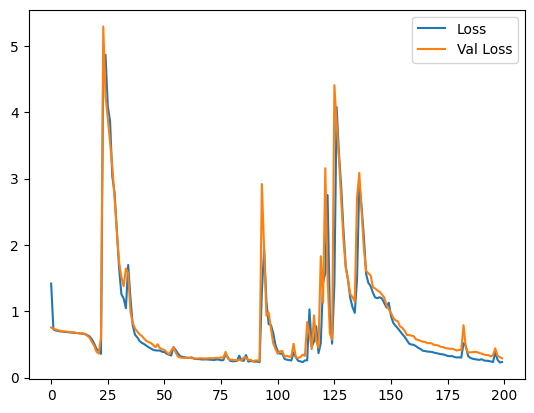

In [8]:
plt.plot(r.history['loss'], label = 'Loss')
plt.plot(r.history['val_loss'], label = 'Val Loss')
plt.legend()

# **Changing the data to long distance**

In [9]:
#dataset
#non linear and long distance based dataset

T = 10
D = 1
X = []
Y = []

# checking the sign of 3 consequtive numbers
# making a pattern of + - + and stuff
# the pattern is at beginning then the lstm should remember for longer - a challenge
# if at the end, then it wont have a trouble remembering
def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  # y = get_label(x, -1, -2, -3) # short distance
  # -1 -2 -3 means last, second last third last
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [ ]:
inputs = np.expand_dims(X,-1)
i = Input(shape = (T,D))
x = SimpleRNN(5)(i)
x = Dense(1, activation  = 'sigmoid')(x)


model = Model(i,x)
model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(learning_rate = 0.01),
              metrics = ['accuracy'])

r = model.fit(inputs, Y, epochs = 200, validation_split = 0.5)

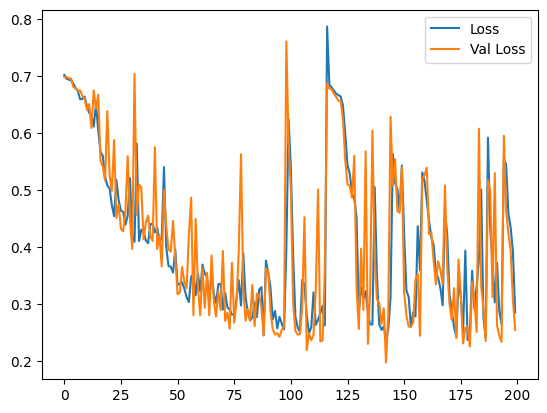

In [12]:
plt.plot(r.history['loss'], label = 'Loss')
plt.plot(r.history['val_loss'], label = 'Val Loss')
plt.legend()

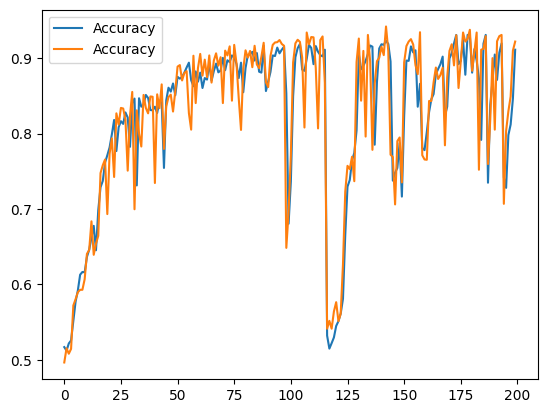

In [13]:
plt.plot(r.history['accuracy'], label = 'Accuracy')
plt.plot(r.history['val_accuracy'], label = 'Accuracy')
plt.legend()

# **USING LSTM**

In [ ]:
inputs = np.expand_dims(X,-1)
i = Input(shape = (T,D))
x = LSTM(5)(i)
x = Dense(1, activation  = 'sigmoid')(x)


model = Model(i,x)
model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(learning_rate = 0.01),
              metrics = ['accuracy'])

r = model.fit(inputs, Y, epochs = 200, validation_split = 0.5)

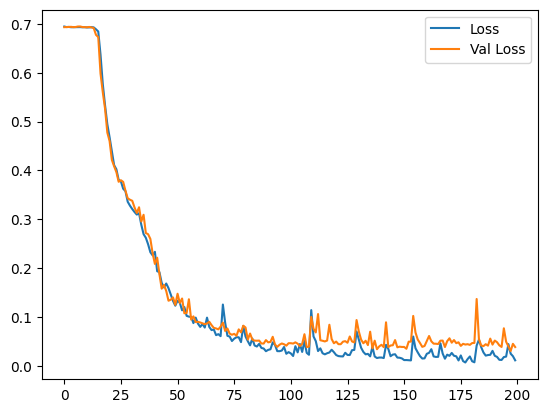

In [15]:
plt.plot(r.history['loss'], label = 'Loss')
plt.plot(r.history['val_loss'], label = 'Val Loss')
plt.legend()

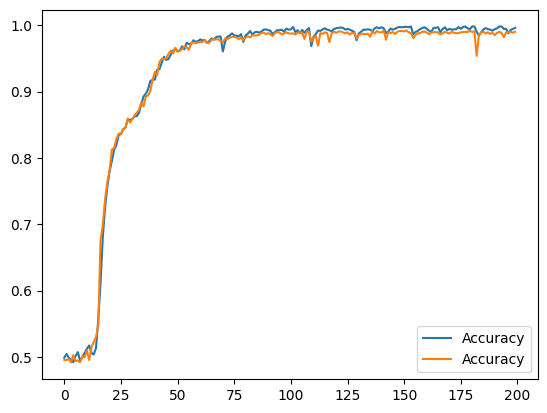

In [16]:
plt.plot(r.history['accuracy'], label = 'Accuracy')
plt.plot(r.history['val_accuracy'], label = 'Accuracy')
plt.legend()

# **USING GRU**

In [3]:
#make the problem harder by increasing T
T = 20
D = 1
X = []
Y = []

# checking the sign of 3 consequtive numbers
# making a pattern of + - + and stuff
# the pattern is at beginning then the lstm should remember for longer - a challenge
# if at the end, then it wont have a trouble remembering
def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  # y = get_label(x, -1, -2, -3) # short distance
  # -1 -2 -3 means last, second last third last
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [4]:
inputs = np.expand_dims(X,-1)
i = Input(shape = (T,D))
x = GRU(5)(i)
x = Dense(1, activation  = 'sigmoid')(x)


model = Model(i,x)
model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(learning_rate = 0.01),
              metrics = ['accuracy'])

r = model.fit(inputs, Y, epochs = 400, validation_split = 0.5)

Epoch 1/400
79/79 [==============================] - 12s 43ms/step - loss: 0.6948 - accuracy: 0.5120 - val_loss: 0.6955 - val_accuracy: 0.4892
Epoch 2/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6928 - accuracy: 0.5056 - val_loss: 0.6965 - val_accuracy: 0.4904
Epoch 3/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6939 - accuracy: 0.5092 - val_loss: 0.6948 - val_accuracy: 0.4948
Epoch 4/400
79/79 [==============================] - 1s 6ms/step - loss: 0.6927 - accuracy: 0.5176 - val_loss: 0.6953 - val_accuracy: 0.4924
Epoch 5/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6930 - accuracy: 0.5104 - val_loss: 0.6941 - val_accuracy: 0.4988
Epoch 6/400
79/79 [==============================] - 1s 6ms/step - loss: 0.6926 - accuracy: 0.5164 - val_loss: 0.6939 - val_accuracy: 0.5016
Epoch 7/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6927 - accuracy: 0.5232 - val_loss: 0.6943 - val_accuracy: 0.4976
Epoch 8/40

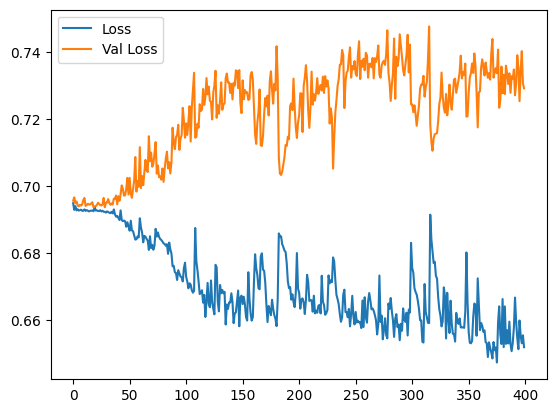

In [5]:
plt.plot(r.history['loss'], label = "Loss")
plt.plot(r.history['val_loss'], label = "Val Loss")
plt.legend()